In [1]:
import torch 
import torch.nn as nn 
import torch.optim as optim 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
X = torch.unsqueeze(torch.linspace(-2, 2, 100), dim=1)
y = 3*X + 0.5 * torch.randn(X.size())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 


In [2]:

model = nn.Linear(1, 1)

class ElasticNetLoss(nn.Module):
    def __init__(self, alpha=1.0, l1_ratio=0.5): 
        super().__init__()
        self.alpha = alpha 
        self.l1_ratio = l1_ratio
        self.mse = nn.MSELoss()
    def forward(self, output, target, model): 
        mse_loss = self.mse(output, target)
        l1_penalty = sum(torch.sum(torch.abs(param)) for param in model.parameters())
        l2_penalty = sum(torch.sum(param ** 2) for param in model.parameters())
        return mse_loss + self.alpha * (self.l1_ratio * l1_penalty + (1 - self.l1_ratio) * l2_penalty)

l = ElasticNetLoss(alpha=0.01, l1_ratio=0.5) 
optimizer = optim.SGD(model.parameters()) 

epochs = 1000
for epoch in range(epochs): 
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train) 
    loss = l(y_pred, y_train, model) 
    loss.backward()
    optimizer.step()

    if (epoch +1)%100 ==0: 
        print("Epoch: ", epoch, "Train loss:", loss) 
model.eval()
with torch.no_grad(): 
    train_preds = model(X_train) 
    test_preds = model(X_test) 
    train_mse = nn.MSELoss() (train_preds, y_train) 
    test_mse = nn.MSELoss() (test_preds, y_test) 

print("Train MSE:", train_mse) 
print("Test MSE:", test_mse) 

Epoch:  99 Train loss: tensor(7.3470, grad_fn=<AddBackward0>)
Epoch:  199 Train loss: tensor(4.4233, grad_fn=<AddBackward0>)
Epoch:  299 Train loss: tensor(2.7236, grad_fn=<AddBackward0>)
Epoch:  399 Train loss: tensor(1.7317, grad_fn=<AddBackward0>)
Epoch:  499 Train loss: tensor(1.1504, grad_fn=<AddBackward0>)
Epoch:  599 Train loss: tensor(0.8080, grad_fn=<AddBackward0>)
Epoch:  699 Train loss: tensor(0.6053, grad_fn=<AddBackward0>)
Epoch:  799 Train loss: tensor(0.4847, grad_fn=<AddBackward0>)
Epoch:  899 Train loss: tensor(0.4124, grad_fn=<AddBackward0>)
Epoch:  999 Train loss: tensor(0.3689, grad_fn=<AddBackward0>)
Train MSE: tensor(0.3135)
Test MSE: tensor(0.2287)


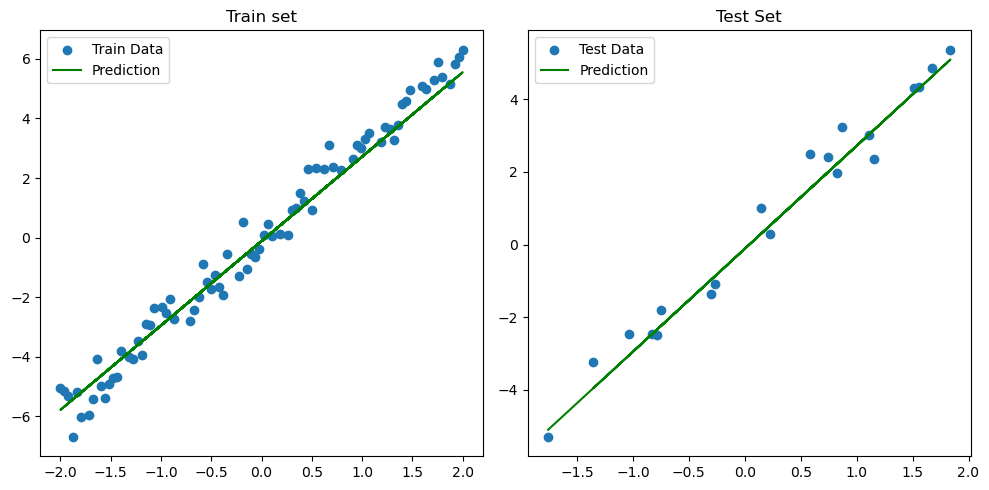

In [3]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1) 
plt.scatter(X_train, y_train, label="Train Data") 
plt.plot(X_train, train_preds, color='green', label = "Prediction")
plt.title("Train set") 
plt.legend()

plt.subplot(1,2,2) 
plt.scatter(X_test, y_test, label="Test Data") 
plt.plot(X_test, test_preds, color="green", label="Prediction") 
plt.title("Test Set") 
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

# Using the same points as source 
X_train = X_train.numpy()
y_train = y_train.numpy()
X_test = X_test.numpy()
y_test = y_test.numpy()
model = ElasticNet(alpha=0.01, l1_ratio=0.5) 
model.fit(X_train, y_train) 
train_preds = model.predict(X_train) 
test_preds = model.predict(X_test) 

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)
r2 = r2_score(y_test, test_preds)

print(f"Train MSE  : {train_mse}")
print(f"Test MSE   : {test_mse}")
print(f"Test RMSE  : {test_rmse}")
print(f"Test MAE   : {test_mae}")
print(f"R² Score   : {r2}")


Train MSE  : 0.2392137050628662
Test MSE   : 0.2508028745651245
Test RMSE  : 0.500802218914032
Test MAE   : 0.4221409857273102
R² Score   : 0.9725784052567644


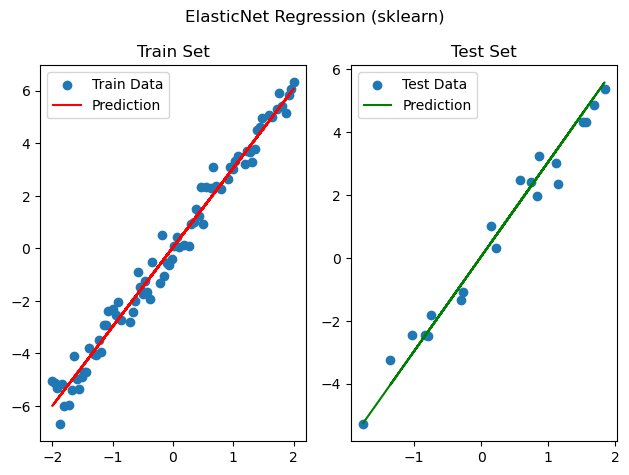

In [12]:
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, label='Train Data')
plt.plot(X_train, train_preds, color='red', label='Prediction')
plt.title("Train Set")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, label='Test Data')
plt.plot(X_test, test_preds, color='green', label='Prediction')
plt.title("Test Set")
plt.legend()

plt.suptitle("ElasticNet Regression (sklearn)")
plt.tight_layout()
plt.show()